As bibliotecas necessárias são importadas. A biblioteca Numpy para manipulação numérica das matrizes, a biblioteca Pandas para criar os dataframes, a biblioteca para separar a matriz de teste e aprendizagem train_test_split, os modelos de algoritmo de classificação pedidos no exercício: Regressão Logística, Arvore de Decisão, RandomForest, KNeighbors, Gradient Boosting, uma biblioteca para pré-processamento do dataset (StandardScaler) e a biblioteca para medir a qualidade preditiva dos modelos (accuracy_score, confusion_matrix e classification_report)

In [53]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

Fazer a carga dos datasets a partir dos arquivos credtrain.txt e credtest.txt, passando o nome das colunas. Verificar se o dataset foi carregado corretamente e analisar o conteúdo do dataset

In [54]:
# Define o nomes das colunas
nomes_colunas = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

# Carrega o dataset de treinamento
dsTrain = pd.read_csv('../data/credtrain.txt', names=nomes_colunas, sep='\t', header=0)

# Carrega o dataset de teste
dsTeste = pd.read_csv('../data/credtest.txt', names=nomes_colunas, sep='\t', header=0 )


In [55]:
dsTrain.head()
dsTeste.head()
dsTrain.info()
dsTrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ESCT     1499 non-null   int64
 1   NDEP     1499 non-null   int64
 2   RENDA    1499 non-null   int64
 3   TIPOR    1499 non-null   int64
 4   VBEM     1499 non-null   int64
 5   NPARC    1499 non-null   int64
 6   VPARC    1499 non-null   int64
 7   TEL      1499 non-null   int64
 8   IDADE    1499 non-null   int64
 9   RESMS    1499 non-null   int64
 10  ENTRADA  1499 non-null   int64
 11  CLASSE   1499 non-null   int64
dtypes: int64(12)
memory usage: 140.7 KB


,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,0.511674,0.126751,984.928619,0.445630,562.197465,8.392262,102.280854,0.134089,41.221481,31.517678,32.276851,0.476318
std,0.660009,0.573047,905.691299,0.497201,265.701366,3.610302,62.994960,0.340862,13.200024,52.677954,94.335403,0.499606
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,468.500000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.000000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.000000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.000000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


No dataset apresentado é identificado alguns atributos categóricos, ainda que estejam representados numericamente, como: Estado Civil (ESCT), Tipo de residência (TIPOR) e se o cliente possui telefone (TEL). Nesses casos será aplicado a técnica de One-hot-encoding, que transpõe os domínios encontrados nestes atributos em campos nomeados destes valores. O campo de número de dependentes (NDEP), apesar de categório, apresenta-se de forma númerica e ordenada, característica coerente com a natureza deste atributo, sendo assim, não será necessário aplicar a técnica de One-hot-encoding em NDEP.

In [56]:
dsTrain = pd.get_dummies(dsTrain, columns=['ESCT','TIPOR','TEL'])
dsTeste = pd.get_dummies(dsTeste, columns=['ESCT','TIPOR','TEL'])

dsTrain.head()
dsTeste.head()

,NDEP,RENDA,VBEM,NPARC,VPARC,IDADE,RESMS,ENTRADA,CLASSE,ESCT_0,ESCT_1,ESCT_2,ESCT_3,TIPOR_0,TIPOR_1,TEL_0,TEL_1
0,0,813,552,4,119,43,48,119,1,False,True,False,False,True,False,True,False
1,0,350,488,12,66,43,0,0,1,False,False,False,True,True,False,True,False
2,0,1530,381,1,398,28,48,0,1,False,True,False,False,True,False,True,False
3,0,688,396,10,60,49,72,0,1,True,False,False,False,False,True,True,False
4,0,888,348,10,51,50,6,0,0,False,True,False,False,False,True,True,False


O dataset é separado em features (X) e target (y) para o dataset de Treinamento (dsTrain) e de teste (dsTeste)

Para equalizar os dados de entrada (feature), foi aplicado a função StandardScaler.

In [57]:
# Split the dataset into features (X) and the target variable (y)
X_train = dsTrain.drop('CLASSE', axis=1)
y_train = dsTrain['CLASSE']

X_test = dsTeste.drop('CLASSE', axis=1)
y_test = dsTeste['CLASSE']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Uma vez realizado o pré-processamento dos dados, o modelo será treinado com os algoritmos solicitados. Verificando a acurácia de modelo.

Regressão Logística

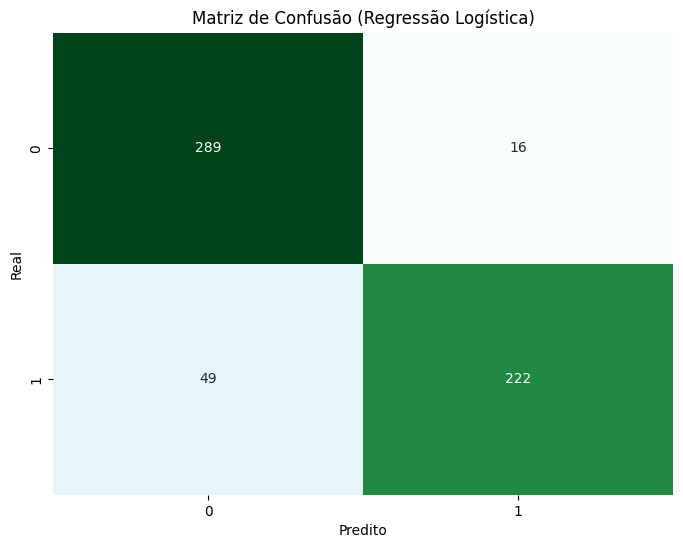

Acurácia do modelo: 0.8871527777777778


In [58]:
# Criar uma lista para os valores de acurácia e os modelos
listaModelos = ['Regressão Logística', 'Arvore de Decisão', 'Random Forest', 'K Neighbors', 'Gradient Boosting']
listaAcuracia =[]

# Aplicando a Regressão Logística
modelLR = LogisticRegression(solver='lbfgs', random_state=0)
modelLR.fit(X_train, y_train)

# Fazer a predição da Regressão Logística
y_predict_LR = modelLR.predict(X_test)


# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_LR)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_LR)
listaAcuracia.append(accuracy)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuGn", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Regressão Logística)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')

Decision Tree Classifier

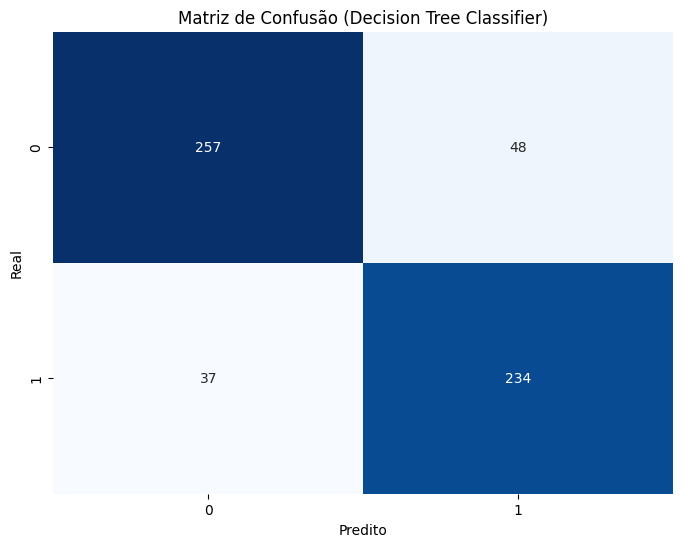

Acurácia do modelo: 0.8524305555555556


In [59]:
# Aplicando a Decision Tree Classifier
modelTree = DecisionTreeClassifier(random_state=13)
modelTree.fit(X_train, y_train)

# Fazer a predição da Decision Tree Classifier
y_predict_Tree = modelTree.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_Tree)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_Tree)
listaAcuracia.append(accuracy)

# Visualizar a Decision Tree Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Decision Tree Classifier)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')



Random Forest Classifier

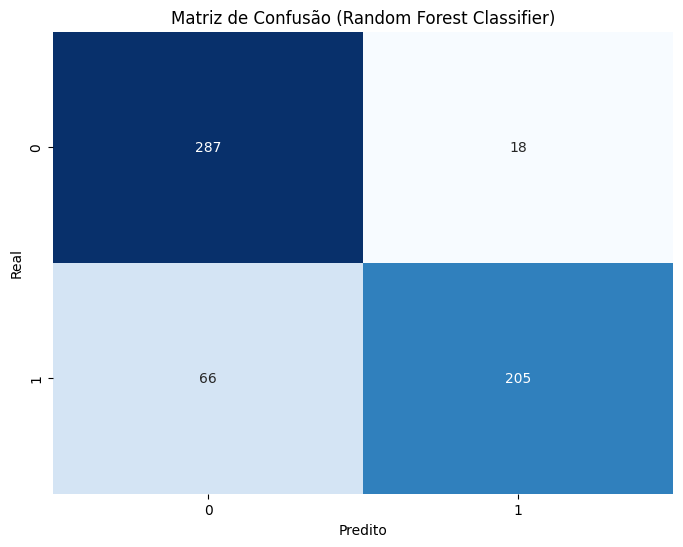

Acurácia do modelo: 0.8541666666666666


In [60]:
# Aplicando a Random Forest Classifier
modelRF = RandomForestClassifier(n_estimators=2, random_state=0)
modelRF.fit(X_train, y_train)

# Fazer a predição da Random Forest Classifier
y_predict_RF = modelRF.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_RF)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_RF)
listaAcuracia.append(accuracy)

# Visualizar a Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Random Forest Classifier)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')


K Neighbors Classifier

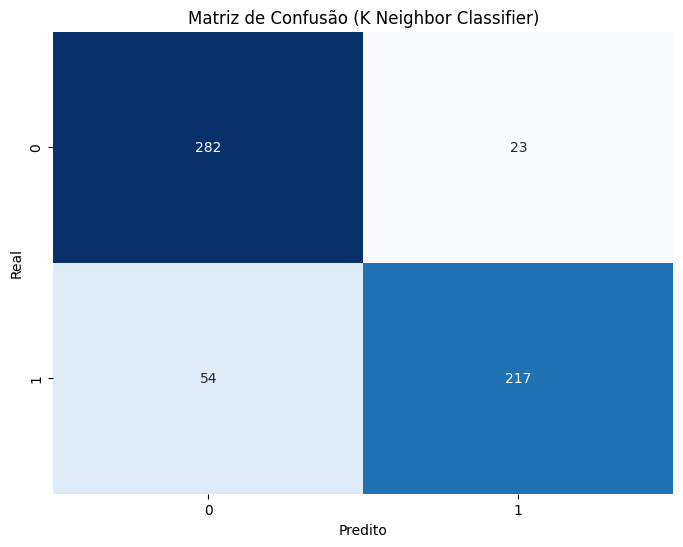

Acurácia do modelo: 0.8663194444444444


In [61]:
# Aplicando a K Neighbors Classifier
modelKN = KNeighborsClassifier(n_neighbors=5)
modelKN.fit(X_train, y_train)

# Fazer a predição de K Neighbors Classifier
y_predict_KN = modelKN.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_KN)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_KN)
listaAcuracia.append(accuracy)

# Visualizar a K Neighbors Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (K Neighbor Classifier)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')



Gradient Boosting Classifier

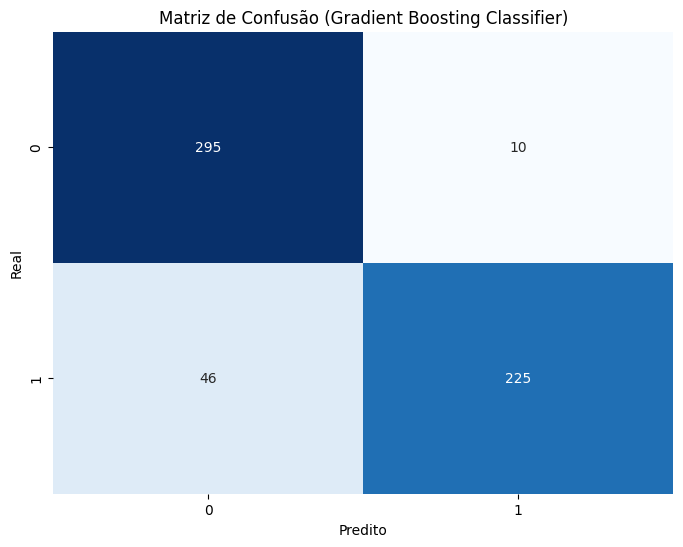

Acurácia do modelo: 0.9027777777777778


In [62]:
# Aplicando a Gradient Boosting Classifier
modelGB = GradientBoostingClassifier()
modelGB.fit(X_train, y_train)

# Fazer a predição de Gradient Boosting Classifier
y_predict_GB = modelGB.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predict_GB)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_predict_GB)
listaAcuracia.append(accuracy)

# Visualizar a Gradiente Boosting Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Gradient Boosting Classifier)')
plt.show()

print(f'Acurácia do modelo: {accuracy}')



In [67]:
# Modelo com melhor precisão
iMelhor=(listaAcuracia.index(max(listaAcuracia)))


print("O melhor modelo é", listaModelos[iMelhor], "com acurácia de", listaAcuracia[iMelhor])

O melhor modelo é Gradient Boosting com acurácia de 0.9027777777777778
